**Time Series Forecasting**

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras

from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

from tensorflow.keras.callbacks import EarlyStopping

In [14]:
dataset_path = 'RSCCASN.xls'

In [18]:
sales_data = pd.read_csv(dataset_path,  parse_dates=True, index_col='DATE')

In [20]:
sales_data

,RSCCASN
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2019-06-01,21123
2019-07-01,21714
2019-08-01,23791


In [8]:
sales_data.columns = ['Sales']

In [9]:
sales_data.columns

Index(['Sales'], dtype='object')

In [10]:
print(sales_data.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 334 entries, 1992-01-01 to 2019-10-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sales   334 non-null    int64
dtypes: int64(1)
memory usage: 5.2 KB
None


In [11]:
print(sales_data.describe())

              Sales
count    334.000000
mean   16325.095808
std     5369.839014
min     6938.000000
25%    12298.500000
50%    15878.500000
75%    19772.500000
max    34706.000000


In [12]:
sales_data.head()

,Sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558


In [13]:
sales_data.tail()

,Sales
DATE,
2019-06-01,21123
2019-07-01,21714
2019-08-01,23791
2019-09-01,19695
2019-10-01,21113


<AxesSubplot:xlabel='DATE'>

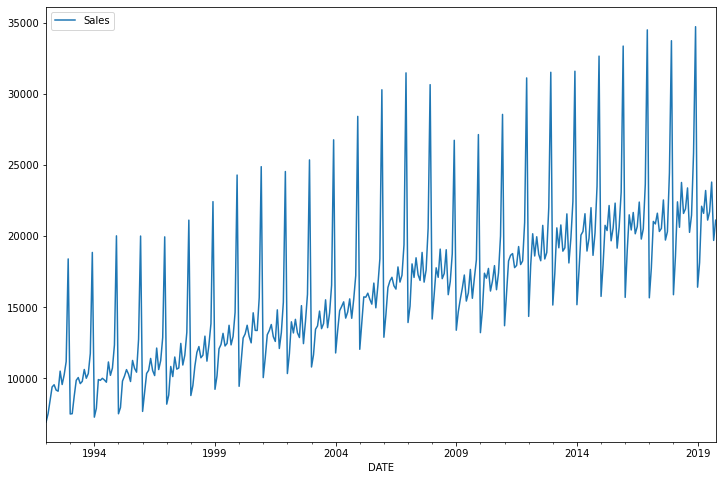

In [14]:
sales_data.plot(figsize=(12, 8))

In [15]:
len(sales_data)

334

In [16]:
len(sales_data) - 18    # 1.5 year

316

In [17]:
test_size = 18
test_index = len(sales_data) - test_size

In [18]:
test_index

316

In [19]:
train = sales_data.iloc[:test_index]
test = sales_data.iloc[test_index:]

In [20]:
train.head()

,Sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558


In [21]:
train.tail()

,Sales
DATE,
2017-12-01,33720
2018-01-01,15881
2018-02-01,18585
2018-03-01,22404
2018-04-01,20616


In [22]:
test.head()

,Sales
DATE,
2018-05-01,23764
2018-06-01,21589
2018-07-01,21919
2018-08-01,23381
2018-09-01,20260


In [23]:
test.tail()

,Sales
DATE,
2019-06-01,21123
2019-07-01,21714
2019-08-01,23791
2019-09-01,19695
2019-10-01,21113


In [24]:
# help(MinMaxScaler)

In [25]:
scaler = MinMaxScaler()

In [26]:
scaler.fit(train)

MinMaxScaler()

In [27]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [28]:
scaled_train[:5]

array([[0.        ],
       [0.02127505],
       [0.05580163],
       [0.08942056],
       [0.09512053]])

In [29]:
scaled_test[:5]

array([[0.61087714],
       [0.53191258],
       [0.54389341],
       [0.59697212],
       [0.4836625 ]])

In [30]:
# help(TimeseriesGenerator)

In [31]:
length = 12

In [32]:
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=1)

In [33]:
X, y = generator[0]

In [34]:
X

array([[[0.        ],
        [0.02127505],
        [0.05580163],
        [0.08942056],
        [0.09512053],
        [0.08146965],
        [0.07860151],
        [0.12979233],
        [0.09566512],
        [0.1203892 ],
        [0.15426227],
        [0.41595266]]])

In [35]:
y

array([[0.02047633]])

In [36]:
len(X[0])

12

In [37]:
# help(LSTM)

In [38]:
n_features = 1

In [81]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, BatchNormalization
from keras.optimizers import Adam

model = Sequential()
# First LSTM layer with Dropout and BatchNormalization
model.add(LSTM(128, activation='relu', return_sequences=True, input_shape=(length, n_features)))
model.add(Dropout(0.3))


# Second LSTM layer with Dropout
model.add(LSTM(64, activation='relu'))
model.add(Dropout(0.3))

# Output layer
model.add(Dense(1))  # For regression tasks

# Compile the model with Adam optimizer and a smaller learning rate
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse')

# Model summary for verification
model.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 12, 128)           66560     
_________________________________________________________________
dropout_4 (Dropout)          (None, 12, 128)           0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 116,033
Trainable params: 116,033
Non-trainable params: 0
_________________________________________________________________


In [82]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 12, 128)           66560     
_________________________________________________________________
dropout_4 (Dropout)          (None, 12, 128)           0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 116,033
Trainable params: 116,033
Non-trainable params: 0
_________________________________________________________________


In [83]:
# help(EarlyStopping)

In [84]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [85]:
validation_generator = TimeseriesGenerator(scaled_test, scaled_test, length=length, batch_size=1)

In [86]:
model.fit(generator, epochs=20, 
          validation_data=validation_generator,
          callbacks=[early_stop])

Epoch 1/20
322/322 [==============================] - 12s 32ms/step - loss: 0.0364 - val_loss: 0.0038
Epoch 2/20
322/322 [==============================] - 10s 31ms/step - loss: 0.0206 - val_loss: 0.0036
Epoch 3/20
322/322 [==============================] - 10s 32ms/step - loss: 0.0133 - val_loss: 7.6729e-04
Epoch 4/20
322/322 [==============================] - 10s 31ms/step - loss: 0.0085 - val_loss: 0.0021
Epoch 5/20
322/322 [==============================] - 10s 31ms/step - loss: 0.0051 - val_loss: 4.0616e-04
Epoch 6/20
322/322 [==============================] - 10s 32ms/step - loss: 0.0069 - val_loss: 0.0174
Epoch 7/20
322/322 [==============================] - 10s 31ms/step - loss: 0.0117 - val_loss: 3.3967e-04
Epoch 8/20
322/322 [==============================] - 10s 31ms/step - loss: 0.0032 - val_loss: 2.4422e-04
Epoch 9/20
322/322 [==============================] - 10s 31ms/step - loss: 0.0025 - val_loss: 8.8511e-04
Epoch 10/20
322/322 [==============================] - 10s 31m

In [87]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

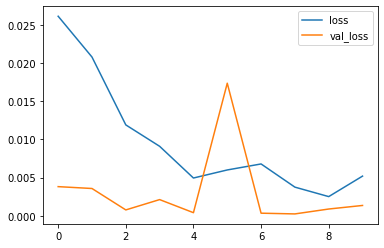

In [88]:
losses.plot()

In [89]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time  stamp ahead 
    current_pred = model.predict(current_batch)[0]
    
    # store prediction 
    test_predictions.append(current_pred)
    
    # update batch to now include prediction and drop first value 
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis=1)

In [90]:
true_prediction = scaler.inverse_transform(test_predictions)

In [91]:
test['Predictions'] = true_prediction

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [92]:
test

,Sales,Predictions
DATE,,
2018-05-01,23764,22284.356484
2018-06-01,21589,21147.877799
2018-07-01,21919,21293.410758
2018-08-01,23381,23091.549305
2018-09-01,20260,20573.570547
2018-10-01,21473,21111.076324
2018-11-01,25831,24738.940695
2018-12-01,34706,32719.472659
2019-01-01,16410,17011.697151


<AxesSubplot:xlabel='DATE'>

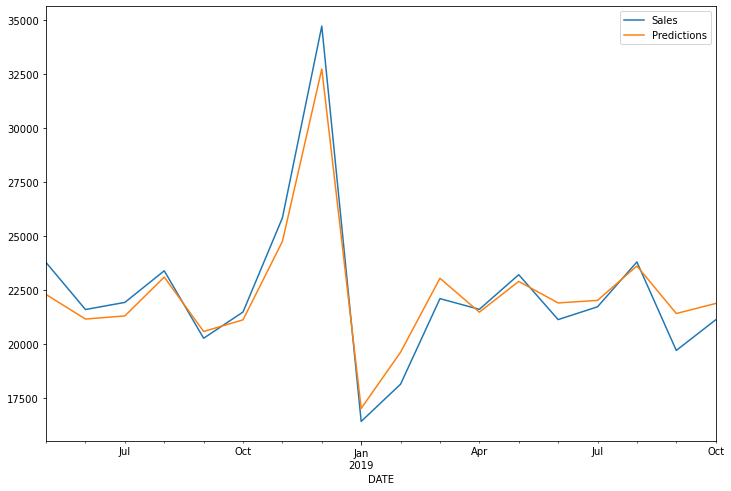

In [93]:
test.plot(figsize=(12, 8))

In [94]:
forecast = []
# Replace periods with whatever forecast lengt you want 
periods = 12

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(periods):
    
    # get prediction 1 time  stamp ahead 
    current_pred = model.predict(current_batch)[0]
    
    # store prediction 
    forecast.append(current_pred)
    
    # update batch to now include prediction and drop first value 
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis=1)

In [95]:
forecast = scaler.inverse_transform(forecast)

In [96]:
sales_data

,Sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2019-06-01,21123
2019-07-01,21714
2019-08-01,23791


In [97]:
forecast

array([[25836.00095463],
       [33405.12013531],
       [17455.94740438],
       [19157.80632424],
       [22671.67822361],
       [22248.8306489 ],
       [23584.47827625],
       [21802.39440536],
       [22306.39534092],
       [24109.42466259],
       [20559.90133381],
       [21804.26928425]])

In [98]:
forecast_index = pd.date_range(start='2019-11-01', periods=periods,
                              freq='MS')

In [99]:
forecast_index

DatetimeIndex(['2019-11-01', '2019-12-01', '2020-01-01', '2020-02-01',
               '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01',
               '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01'],
              dtype='datetime64[ns]', freq='MS')

In [100]:
forecast_data = pd.DataFrame(data=forecast, index=forecast_index, 
                             columns=['Forecast'])

In [101]:
forecast_data

,Forecast
2019-11-01,25836.000955
2019-12-01,33405.120135
2020-01-01,17455.947404
2020-02-01,19157.806324
2020-03-01,22671.678224
2020-04-01,22248.830649
2020-05-01,23584.478276
2020-06-01,21802.394405
2020-07-01,22306.395341
2020-08-01,24109.424663


<AxesSubplot:>

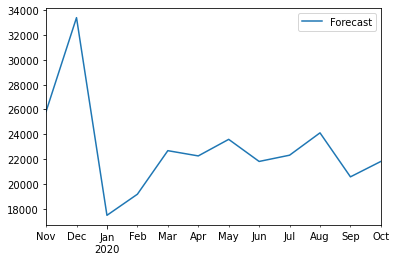

In [102]:
forecast_data.plot()

<AxesSubplot:xlabel='DATE'>

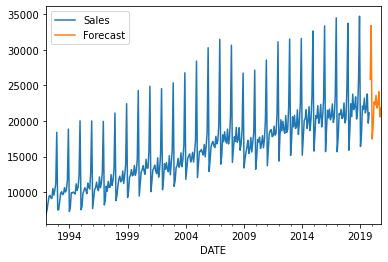

In [103]:
ax = sales_data.plot()
forecast_data.plot(ax=ax)

(576.0, 611.0)

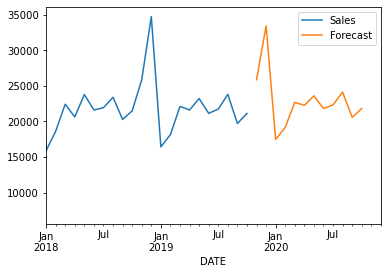

In [104]:
ax = sales_data.plot()
forecast_data.plot(ax=ax)
plt.xlim('2018-01-01', '2020-12-01')

**Happy Learning :)**